___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# `Reviews Classification using Natural Language Processing`
## `Introduction`

This is to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

[Yelp Review Data Set](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.


### `Import dependencies`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#nltk.download('stopwords')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### `Load data`

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.shape

(10000, 10)

In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [8]:
yelp['text_length'] = yelp['text'].apply(len)

# EDA

<AxesSubplot:xlabel='stars', ylabel='count'>

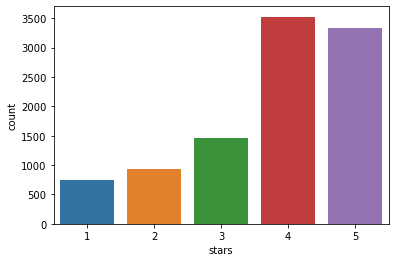

In [9]:
sns.countplot(x="stars", data=yelp)

Data is imbalanced

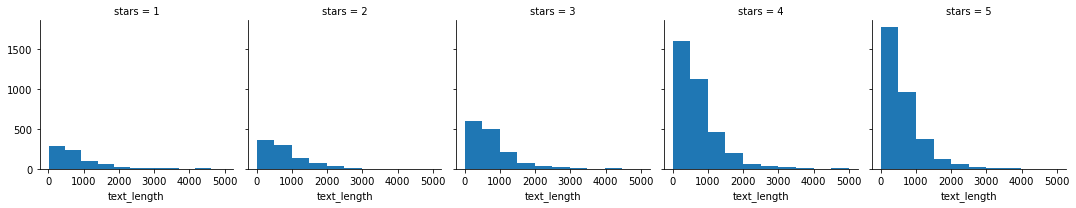

In [10]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text_length')

<AxesSubplot:xlabel='stars', ylabel='text_length'>

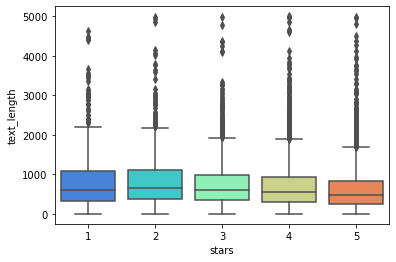

In [11]:
sns.boxplot(x='stars',y='text_length',data=yelp,palette='rainbow')

We can observe that reviews with short length are having good ratings. And there are outliers in the data.

In [12]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [13]:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

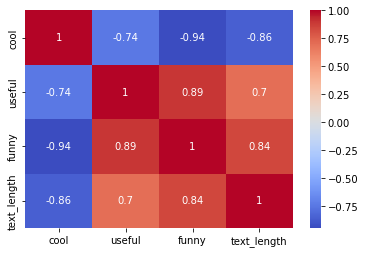

In [14]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

Funny column is highly correlated with cool column

<AxesSubplot:>

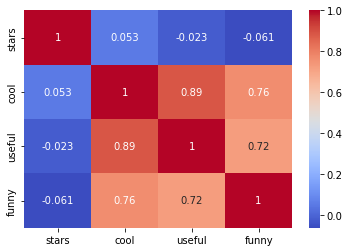

In [15]:
sns.heatmap(yelp.iloc[:,[3,7,8,9]].corr(),cmap='coolwarm',annot=True)

## `Text Normalization`
### 1. Tokenization
### 2. Stopwords exclusion
### 3. Stemming

In [16]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def text_normalize(text):
    text = text.lower()
    
    nopunc = [char for char in text if char not in string.punctuation] # remove punctuation
    nopunc = "".join(nopunc)
    stopwords_all = stopwords.words("english")
    stopwords_all.remove('not')
    nostop = [word for word in nopunc.split() if word not in stopwords_all] # tokenization and stopwords removal 
    
    ps = PorterStemmer()
    stem_text = [ps.stem(word) for word in nostop]
    
    return [word for word in stem_text] 

### `Corpus`

In [17]:
corpus = yelp["text"].apply("".join)
corpus

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [18]:
yelp["text"].head(5).apply(text_normalize)

0    [wife, took, birthday, breakfast, excel, weath...
1    [idea, peopl, give, bad, review, place, goe, s...
2    [love, gyro, plate, rice, good, also, dig, can...
3    [rosi, dakota, love, chaparr, dog, park, conve...
4    [gener, manag, scott, petello, good, egg, not,...
Name: text, dtype: object

In [19]:
yelp_class = yelp[(yelp["stars"]==1) | (yelp["stars"]==5)]

In [20]:
X = yelp_class["text"]
y = yelp_class["stars"]

### `Train Test Split`

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

### `CountVectorizer`

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=text_normalize)

In [24]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

### `Over Sampling`

In [25]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE : \n", pd.DataFrame(y_train).value_counts(),"\n")

smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE : \n", pd.DataFrame(y_train).value_counts())

Before SMOTE : 
 stars
5        2339
1         521
dtype: int64 

After SMOTE : 
 stars
1        2339
5        2339
dtype: int64


## `Training a Model`

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [27]:
nb.fit(X_train,y_train)

MultinomialNB()

In [28]:
y_pred = nb.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### `Accuracy`

In [30]:
print("Accuracy : ", round(accuracy_score(y_test, y_pred)*100, 2), "%")

Accuracy :  93.8 %


In [31]:
print("Confusion Matrix")
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
print('\n')
print(classification_report(y_test, y_pred))

Confusion Matrix


[[188  40]
 [ 36 962]]


Classification Report


              precision    recall  f1-score   support

           1       0.84      0.82      0.83       228
           5       0.96      0.96      0.96       998

    accuracy                           0.94      1226
   macro avg       0.90      0.89      0.90      1226
weighted avg       0.94      0.94      0.94      1226



### `Adding Tfidf Transformer`

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

## `Pipeline`

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### `Train Test Split`

In [35]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [36]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### `Predictions and Evaluation`

In [37]:
y_pred2 = pipeline.predict(X_test)

### `Accuracy`

In [38]:
print("Accuracy : ", round(accuracy_score(y_test, y_pred2)*100, 2), "%")

Accuracy :  81.4 %


In [39]:
print("Confusion Matrix")
print('\n')
print(confusion_matrix(y_test, y_pred2))
print('\n')
print("Classification Report")
print('\n')
print(classification_report(y_test, y_pred2))

Confusion Matrix


[[  0 228]
 [  0 998]]


Classification Report


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



#### Looks like Tf-Idf actually made things worse!
#### Observed good score when predicted without fitting tfidf transformer.